In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
date = "09-20-24"
data_location = rf"E:\Project 6 - Temperature\Experiments\data_analysis\{date}"
full_periods = pd.read_csv(data_location + f"/{date}_full_periods.csv")
partial_periods = pd.read_csv(data_location + f"/{date}_partial_periods.csv")

# Full period - Second cycle

In [3]:
control = full_periods[
    (full_periods["POSITION"] <= 13) &
    (full_periods["PEAK_TO_PEAK_CYCLE_NUMBER"] == 2)
]
treatment_1 = full_periods[
    (full_periods["POSITION"] >= 14) & (full_periods["POSITION"] <= 27) &
    (full_periods["PEAK_TO_PEAK_CYCLE_NUMBER"] == 2)
]

treatment_2 = full_periods[
    (full_periods["POSITION"] >= 28) & (full_periods["POSITION"] <= 41) &
    (full_periods["PEAK_TO_PEAK_CYCLE_NUMBER"] == 2)
]

In [4]:
control_temperature = control["MEAN_TEMPERATURE"]
control_periods = control["PEAK_TO_PEAK_PERIOD"]
treatment_1_temperature = treatment_1["MEAN_TEMPERATURE"]
treatment_1_periods = treatment_1["PEAK_TO_PEAK_PERIOD"]
treatment_2_temperature = treatment_2["MEAN_TEMPERATURE"]
treatment_2_periods = treatment_2["PEAK_TO_PEAK_PERIOD"]

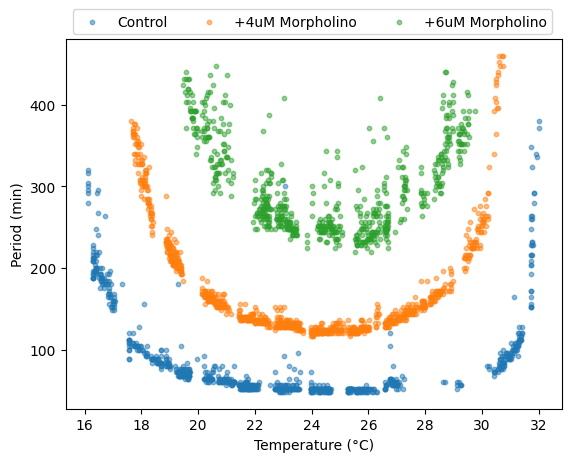

In [5]:
fig, ax = plt.subplots()
# ax.title.set_text("Full Period - Cycle 2")
ax.scatter(control_temperature, control_periods, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_1_temperature, treatment_1_periods, label="+4uM Morpholino",
           color="tab:orange", alpha=0.5, s=10)
ax.scatter(treatment_2_temperature, treatment_2_periods, label="+6uM Morpholino",
           color="tab:green", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Period (min)")
ax.legend(bbox_to_anchor=(0.0, 1.1), loc='upper left', ncols=3)
plt.savefig(data_location + f"/{date}_full_periods_cycle_2.png", dpi=300)
plt.show()

In [13]:
save_path = "E:/Thesis/Chapter 4 - Temperature/"

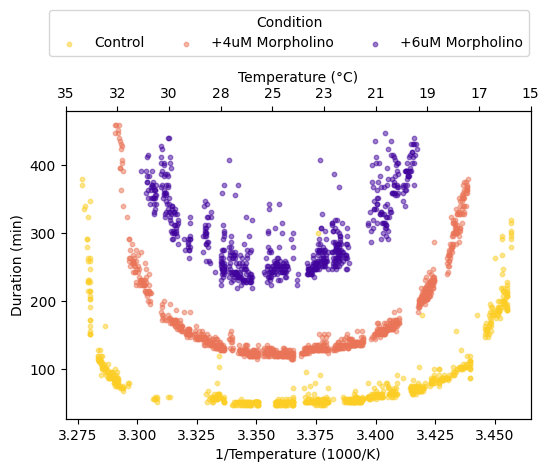

In [ ]:
# Plot for thesis
K0 = 273.15
cmap = plt.get_cmap("plasma")
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(1000 / (control_temperature + K0) , control_periods, label="Control",
           color=cmap(0.9), alpha=0.5, s=10)
ax.scatter(1000 / (treatment_1_temperature + K0), treatment_1_periods, label="+4uM Morpholino",
           color=cmap(0.65), alpha=0.5, s=10)
ax.scatter(1000 / (treatment_2_temperature + K0), treatment_2_periods, label="+6uM Morpholino",
           color=cmap(0.1), alpha=0.5, s=10)
ax.set_xlabel("1/Temperature (1000/K)")
ax.set_ylabel("Duration (min)")

ax.set_xlim([3.27, 3.465])
ax2 = ax.twiny()
xticks = ax.get_xticks()
new_labels = [f"{1000/t - K0:.0f}" for t in xticks]
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(xticks)
ax2.set_xticklabels(new_labels)
ax2.set_xlabel("Temperature (°C)")

ax.legend(title="Condition", 
          bbox_to_anchor=(-0.05, 1.35), loc='upper left', ncols=3)

save_fig_path = save_path + "morpholino_data.pdf"
plt.savefig(save_fig_path)
plt.show()

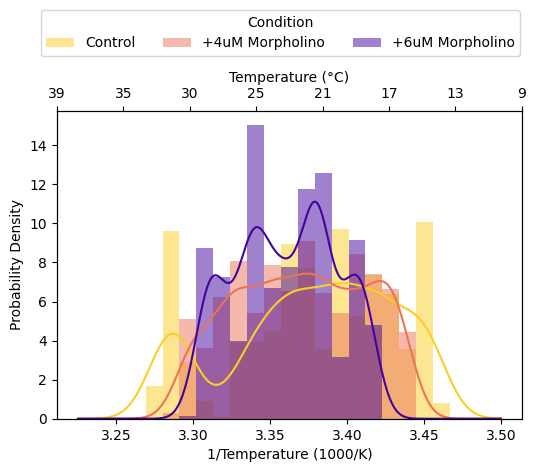

In [28]:
from scipy.stats import gaussian_kde
# For thesis - Robustness
cmap = plt.get_cmap("plasma")
nbins = 25
xrange = [3.225, 3.5]
control_x = 1000 / (control_temperature + K0)
treatment_1_x = 1000 / (treatment_1_temperature + K0)
treatment_2_x = 1000 / (treatment_2_temperature + K0)

fig, ax = plt.subplots(figsize=(6, 4))
# histogram
ax.hist(control_x, bins=nbins, range=xrange, color=cmap(0.9), 
        alpha=0.5, label="Control", density=True)
ax.hist(treatment_1_x, bins=nbins, range=xrange, color=cmap(0.65), 
        alpha=0.5, label="+4uM Morpholino", density=True)
ax.hist(treatment_2_x, bins=nbins, range=xrange, color=cmap(0.1), 
        alpha=0.5, label="+6uM Morpholino", density=True)

# kde
kde_control = gaussian_kde(control_x)
kde_treatment_1 = gaussian_kde(treatment_1_x)
kde_treatment_2 = gaussian_kde(treatment_2_x)

x = np.linspace(xrange[0], xrange[1], 1000)
ax.plot(x, kde_control(x), color=cmap(0.9))
ax.plot(x, kde_treatment_1(x), color=cmap(0.65))
ax.plot(x, kde_treatment_2(x), color=cmap(0.1))

ax.set_xlabel("1/Temperature (1000/K)")
ax.set_ylabel("Probability Density")
ax.legend(title="Condition", 
          bbox_to_anchor=(-0.05, 1.35), loc='upper left', ncols=3)

# second axis
ax2 = ax.twiny()
xticks = ax.get_xticks()
new_labels = [f"{1000/t - K0:.0f}" for t in xticks]
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(xticks)
ax2.set_xticklabels(new_labels)
ax2.set_xlabel("Temperature (°C)")
save_fig_path = save_path + "morpholino_data_robustness.pdf"
plt.savefig(save_fig_path)
plt.show()

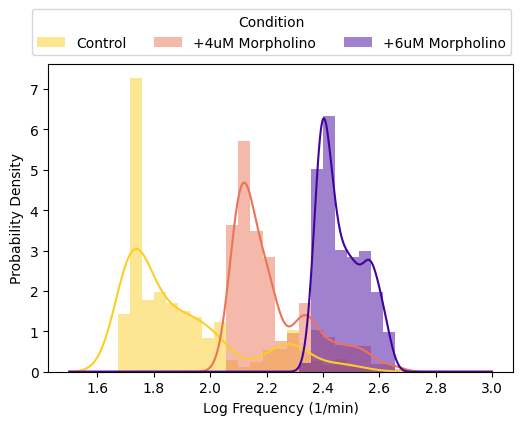

In [14]:
from scipy.stats import gaussian_kde
# For thesis - Tunability
cmap = plt.get_cmap("plasma")
nbins = 35
xrange = [1.5, 3]

control_y = control_periods
treatment_1_y = treatment_1_periods
treatment_2_y = treatment_2_periods

fig, ax = plt.subplots(figsize=(6, 4))
# histogram
ax.hist(np.log10(control_y), bins=nbins, range=xrange, color=cmap(0.9), 
        alpha=0.5, label="Control", density=True)
ax.hist(np.log10(treatment_1_y), bins=nbins, range=xrange, color=cmap(0.65),
        alpha=0.5, label="+4uM Morpholino", density=True)
ax.hist(np.log10(treatment_2_y), bins=nbins, range=xrange, color=cmap(0.1),
        alpha=0.5, label="+6uM Morpholino", density=True)

# kde
kde_control = gaussian_kde(np.log10(control_y))
kde_treatment_1 = gaussian_kde(np.log10(treatment_1_y))
kde_treatment_2 = gaussian_kde(np.log10(treatment_2_y))

x = np.linspace(xrange[0], xrange[1], 1000)
ax.plot(x, kde_control(x), color=cmap(0.9))
ax.plot(x, kde_treatment_1(x), color=cmap(0.65))
ax.plot(x, kde_treatment_2(x), color=cmap(0.1))

ax.set_xlabel("Log Frequency (1/min)")
ax.set_ylabel("Probability Density")
ax.legend(title="Condition", 
          bbox_to_anchor=(-0.05, 1.2), loc='upper left', ncols=3)
save_fig_path = save_path + "morpholino_data_tunability.pdf"
plt.savefig(save_fig_path)
plt.show()

In [26]:
# Prepare data to share
control_full_periods = control[["MEAN_TEMPERATURE", "PEAK_TO_PEAK_PERIOD"]]
control_full_periods.columns = ["Temperature", "Full_Period"]
control_full_periods.to_csv(data_location + f"/{date}_control_full_periods.csv", index=False)

treatment_1_full_periods = treatment_1[["MEAN_TEMPERATURE", "PEAK_TO_PEAK_PERIOD"]]
treatment_1_full_periods.columns = ["Temperature", "Full_Period"]
treatment_1_full_periods.to_csv(data_location + f"/{date}_4uM_MO_full_periods.csv", index=False)

treatment_2_full_periods = treatment_2[["MEAN_TEMPERATURE", "PEAK_TO_PEAK_PERIOD"]]
treatment_2_full_periods.columns = ["Temperature", "Full_Period"]
treatment_2_full_periods.to_csv(data_location + f"/{date}_6uM_MO_full_periods.csv", index=False)

# Rising period - Second cycle

In [27]:
control = partial_periods[
    (partial_periods["POSITION"] <= 13) &
    (partial_periods["TROUGH_TO_PEAK_CYCLE_NUMBER"] == 2)
]
treatment_1 = partial_periods[
    (partial_periods["POSITION"] >= 14) & (partial_periods["POSITION"] <= 27) &
    (partial_periods["TROUGH_TO_PEAK_CYCLE_NUMBER"] == 2)
]

treatment_2 = partial_periods[
    (partial_periods["POSITION"] >= 28) & (partial_periods["POSITION"] <= 41) &
    (partial_periods["TROUGH_TO_PEAK_CYCLE_NUMBER"] == 2)
]

In [28]:
control_temperature = control["MEAN_TEMPERATURE"]
control_periods = control["TROUGH_TO_PEAK_PERIOD"]
treatment_1_temperature = treatment_1["MEAN_TEMPERATURE"]
treatment_1_periods = treatment_1["TROUGH_TO_PEAK_PERIOD"]
treatment_2_temperature = treatment_2["MEAN_TEMPERATURE"]
treatment_2_periods = treatment_2["TROUGH_TO_PEAK_PERIOD"]

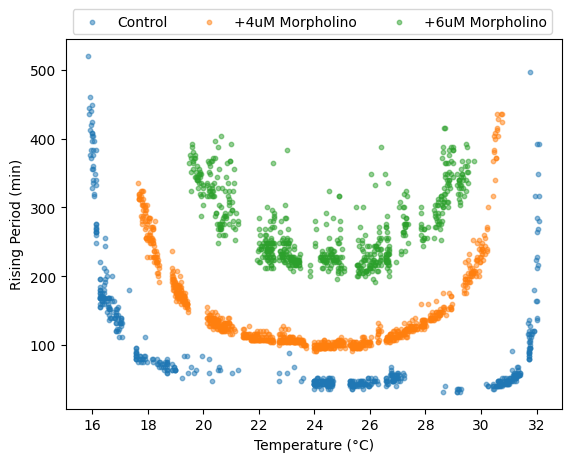

In [29]:
fig, ax = plt.subplots()
# ax.title.set_text("Rising Period - Cycle 2")
ax.scatter(control_temperature, control_periods, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_1_temperature, treatment_1_periods, label="+4uM Morpholino",
           color="tab:orange", alpha=0.5, s=10)
ax.scatter(treatment_2_temperature, treatment_2_periods, label="+6uM Morpholino",
           color="tab:green", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Rising Period (min)")
ax.legend(bbox_to_anchor=(0.0, 1.1), loc='upper left', ncols=3)
plt.savefig(data_location + f"/{date}_rising_periods.png", dpi=300)
plt.show()

In [30]:
# Prepare data to share
control_partial_periods = control[["MEAN_TEMPERATURE", "TROUGH_TO_PEAK_PERIOD"]]
control_partial_periods.columns = ["Temperature", "Rising_Period"]
control_partial_periods.to_csv(data_location + f"/{date}_control_rising_periods.csv", index=False)
treatment_1_partial_periods = treatment_1[["MEAN_TEMPERATURE", "TROUGH_TO_PEAK_PERIOD"]]
treatment_1_partial_periods.columns = ["Temperature", "Rising_Period"]
treatment_1_partial_periods.to_csv(data_location + f"/{date}_4uM_MO_rising_periods.csv", index=False)
treatment_2_partial_periods = treatment_2[["MEAN_TEMPERATURE", "TROUGH_TO_PEAK_PERIOD"]]
treatment_2_partial_periods.columns = ["Temperature", "Rising_Period"]
treatment_2_partial_periods.to_csv(data_location + f"/{date}_6uM_MO_rising_periods.csv", index=False)

# Falling period - Second cycle

In [31]:
control = partial_periods[
    (partial_periods["POSITION"] <= 13) &
    (partial_periods["PEAK_TO_TROUGH_CYCLE_NUMBER"] == 2)
]
treatment_1 = partial_periods[
    (partial_periods["POSITION"] >= 14) & (partial_periods["POSITION"] <= 27) &
    (partial_periods["PEAK_TO_TROUGH_CYCLE_NUMBER"] == 2)
]

treatment_2 = partial_periods[
    (partial_periods["POSITION"] >= 28) & (partial_periods["POSITION"] <= 41) &
    (partial_periods["PEAK_TO_TROUGH_CYCLE_NUMBER"] == 2)
]

In [32]:
control_temperature = control["MEAN_TEMPERATURE"]
control_periods = control["PEAK_TO_TROUGH_PERIOD"]
treatment_1_temperature = treatment_1["MEAN_TEMPERATURE"]
treatment_1_periods = treatment_1["PEAK_TO_TROUGH_PERIOD"]
treatment_2_temperature = treatment_2["MEAN_TEMPERATURE"]
treatment_2_periods = treatment_2["PEAK_TO_TROUGH_PERIOD"]

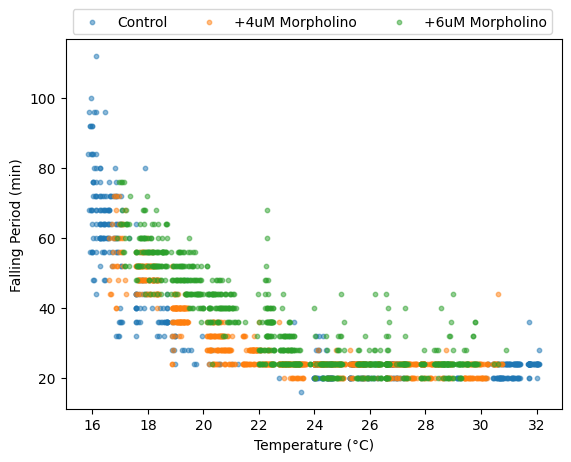

In [33]:
fig, ax = plt.subplots()
# ax.title.set_text("Falling Period - Cycle 2")
ax.scatter(control_temperature, control_periods, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_1_temperature, treatment_1_periods, label="+4uM Morpholino",
           color="tab:orange", alpha=0.5, s=10)
ax.scatter(treatment_2_temperature, treatment_2_periods, label="+6uM Morpholino",
           color="tab:green", alpha=0.5, s=10)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Falling Period (min)")
ax.legend(bbox_to_anchor=(0.0, 1.1), loc='upper left', ncols=3)
plt.savefig(data_location + f"/{date}_falling_periods.png", dpi=300)
plt.show()

In [34]:
# Prepare data to share
control_partial_periods = control[["MEAN_TEMPERATURE", "PEAK_TO_TROUGH_PERIOD"]]
control_partial_periods.columns = ["Temperature", "Falling_Period"]
control_partial_periods.to_csv(data_location + f"/{date}_control_falling_periods.csv", index=False)
treatment_1_partial_periods = treatment_1[["MEAN_TEMPERATURE", "PEAK_TO_TROUGH_PERIOD"]]
treatment_1_partial_periods.columns = ["Temperature", "Falling_Period"]
treatment_1_partial_periods.to_csv(data_location + f"/{date}_4uM_MO_falling_periods.csv", index=False)
treatment_2_partial_periods = treatment_2[["MEAN_TEMPERATURE", "PEAK_TO_TROUGH_PERIOD"]]
treatment_2_partial_periods.columns = ["Temperature", "Falling_Period"]
treatment_2_partial_periods.to_csv(data_location + f"/{date}_6uM_MO_falling_periods.csv", index=False)

# Plot peaks

In [3]:
all_data = pd.read_csv(data_location + rf"\{date}_all_features_combined_renumbered.csv")

In [10]:
track = 19
pos = 2
data = all_data[(all_data["TRACK_ID"] == track) & (all_data["POSITION"] == pos)]

In [11]:
data

,TRACK_ID,TIME,RATIO,TYPE,CYCLE,POSITION,STD_X,MEAN_RADIUS,STD_RADIUS,MEAN_X,MEAN_TEMPERATURE,CYCLE_STR,POSITION_STR
849,19.0,112.0,1.051475,PEAK,2.0,2,27.034876,37.5,0.0,4340.136118,17.707886,2.0,2
850,19.0,232.0,1.018154,PEAK,3.0,2,27.034876,37.5,0.0,4340.136118,17.707886,3.0,2
851,19.0,340.0,1.011020,PEAK,4.0,2,27.034876,37.5,0.0,4340.136118,17.707886,4.0,2
852,19.0,440.0,1.019547,PEAK,5.0,2,27.034876,37.5,0.0,4340.136118,17.707886,5.0,2
853,19.0,524.0,0.986292,PEAK,6.0,2,27.034876,37.5,0.0,4340.136118,17.707886,6.0,2
854,19.0,28.0,0.881508,TROUGH,2.0,2,27.034876,37.5,0.0,4340.136118,17.707886,2.0,2
855,19.0,160.0,0.870835,TROUGH,3.0,2,27.034876,37.5,0.0,4340.136118,17.707886,3.0,2
856,19.0,268.0,0.859218,TROUGH,4.0,2,27.034876,37.5,0.0,4340.136118,17.707886,4.0,2
857,19.0,368.0,0.844023,TROUGH,5.0,2,27.034876,37.5,0.0,4340.136118,17.707886,5.0,2
858,19.0,476.0,0.847107,TROUGH,6.0,2,27.034876,37.5,0.0,4340.136118,17.707886,6.0,2


In [14]:
full_data = full_periods[(full_periods["TRACK_ID"] == track) & (full_periods["POSITION"] == pos)]
partial_data = partial_periods[(partial_periods["TRACK_ID"] == track) & (partial_periods["POSITION"] == pos)]

In [15]:
full_data

,PEAK_TO_PEAK_PERIOD,PEAK_TO_PEAK_CYCLE_NUMBER,TROUGH_TO_TROUGH_PERIOD,TROUGH_TO_TROUGH_CYCLE_NUMBER,TRACK_ID,POSITION,MEAN_TEMPERATURE
338,120.0,2.0,132.0,2.0,19.0,2.0,17.707886
339,108.0,3.0,108.0,3.0,19.0,2.0,17.707886
340,100.0,4.0,100.0,4.0,19.0,2.0,17.707886
341,84.0,5.0,108.0,5.0,19.0,2.0,17.707886


In [16]:
partial_data

,PEAK_TO_TROUGH_PERIOD,TROUGH_TO_PEAK_PERIOD,PEAK_TO_TROUGH_CYCLE_NUMBER,TROUGH_TO_PEAK_CYCLE_NUMBER,TRACK_ID,POSITION,MEAN_TEMPERATURE
373,48.0,84.0,2.0,2.0,19.0,2,17.707886
374,36.0,72.0,3.0,3.0,19.0,2,17.707886
375,28.0,72.0,4.0,4.0,19.0,2,17.707886
376,36.0,72.0,5.0,5.0,19.0,2,17.707886
377,NaN,48.0,6.0,6.0,19.0,2,17.707886


In [36]:
control = all_data[
    (all_data["POSITION"] <= 13) &
    ((all_data["CYCLE"] == 2) | (all_data["CYCLE"] == 3)) &
    (all_data["TYPE"] == "PEAK")
]
treatment_1 = all_data[
    (all_data["POSITION"] >= 14) & (all_data["POSITION"] <= 27) &
    ((all_data["CYCLE"] == 2) | (all_data["CYCLE"] == 3)) &
    (all_data["TYPE"] == "PEAK")
]
treatment_2 = all_data[
    (all_data["POSITION"] >= 28) & (all_data["POSITION"] <= 41) &
    ((all_data["CYCLE"] == 2) | (all_data["CYCLE"] == 3)) &
    (all_data["TYPE"] == "PEAK")
]

In [37]:
control_temperature = control["MEAN_TEMPERATURE"]
control_peak_times = control["TIME"]
treatment_1_temperature = treatment_1["MEAN_TEMPERATURE"]
treatment_1_peak_times = treatment_1["TIME"]
treatment_2_temperature = treatment_2["MEAN_TEMPERATURE"]
treatment_2_peak_times = treatment_2["TIME"]

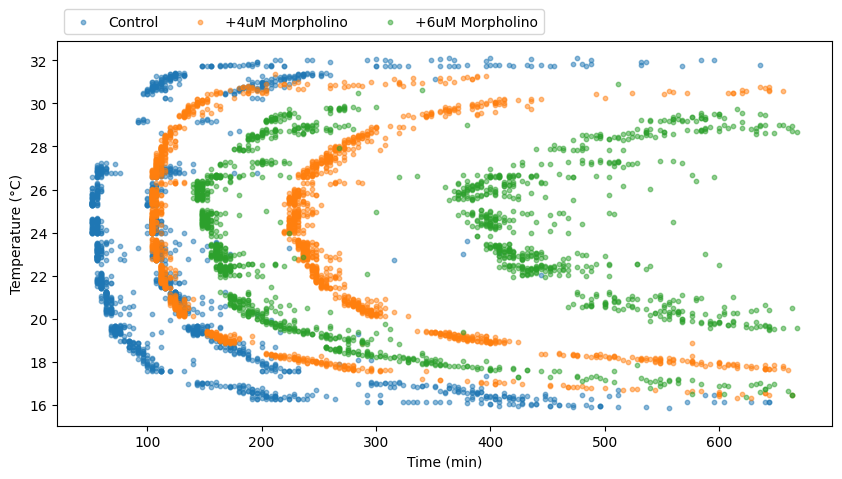

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
# ax.title.set_text("Peaks - Cycles 2 and 3")
ax.scatter(control_peak_times, control_temperature, label="Control",
           color="tab:blue", alpha=0.5, s=10)
ax.scatter(treatment_1_peak_times, treatment_1_temperature, label="+4uM Morpholino",
           color="tab:orange", alpha=0.5, s=10)
ax.scatter(treatment_2_peak_times, treatment_2_temperature, label="+6uM Morpholino",
           color="tab:green", alpha=0.5, s=10)
ax.set_xlabel("Time (min)")
ax.set_ylabel("Temperature (°C)")
ax.legend(bbox_to_anchor=(0.0, 1.1), loc='upper left', ncols=3)
plt.savefig(data_location + f"/{date}_peaks_cycles_2_and_3.png", dpi=300)
plt.show()

In [39]:
# Prepare data to share
control_peaks = control[["TIME", "MEAN_TEMPERATURE", "CYCLE"]]
control_peaks.columns = ["Time", "Temperature", "Cycle"]
control_peaks.to_csv(data_location + f"/{date}_control_peaks.csv", index=False)
treatment_1_peaks = treatment_1[["TIME", "MEAN_TEMPERATURE", "CYCLE"]]
treatment_1_peaks.columns = ["Time", "Temperature", "Cycle"]
treatment_1_peaks.to_csv(data_location + f"/{date}_4uM_MO_peaks.csv", index=False)
treatment_2_peaks = treatment_2[["TIME", "MEAN_TEMPERATURE", "CYCLE"]]
treatment_2_peaks.columns = ["Time", "Temperature", "Cycle"]
treatment_2_peaks.to_csv(data_location + f"/{date}_6uM_MO_peaks.csv", index=False)